In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('DataSets/train.csv')
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [4]:
lists = [x for x in data.columns if x != 'critical_temp']

x = np.array(data[lists])
y = np.array(data[['critical_temp']])

scaler = StandardScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [15]:
lin = LinearRegression()
lin.fit(x, y)
y_pred_l = lin.predict(x_test)

reg = SGDRegressor()
reg.fit(x, y)
y_pred_r = reg.predict(x_test)

svr = SVR(C=2.0, gamma=0.01)
svr.fit(x, y)
y_pred_s = svr.predict(x_test)

/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
print(f'R2 en LinearRegression es: {r2_score(y_test, y_pred_l)}')
print(f'R2 en Variables estocásticas es: {r2_score(y_test, y_pred_r)}')
print(f'R2 en Regresion de vectores de soporte es: {r2_score(y_test, y_pred_s)}')

R2 en LinearRegression es: 0.7324101740504927
R2 en Variables estocásticas es: 0.7183648870402903
R2 en Regresion de vectores de soporte es: 0.8464124992646891


## El mejor método o el método que mejor representa estos datos, parece ser el de soporte vectorial ##

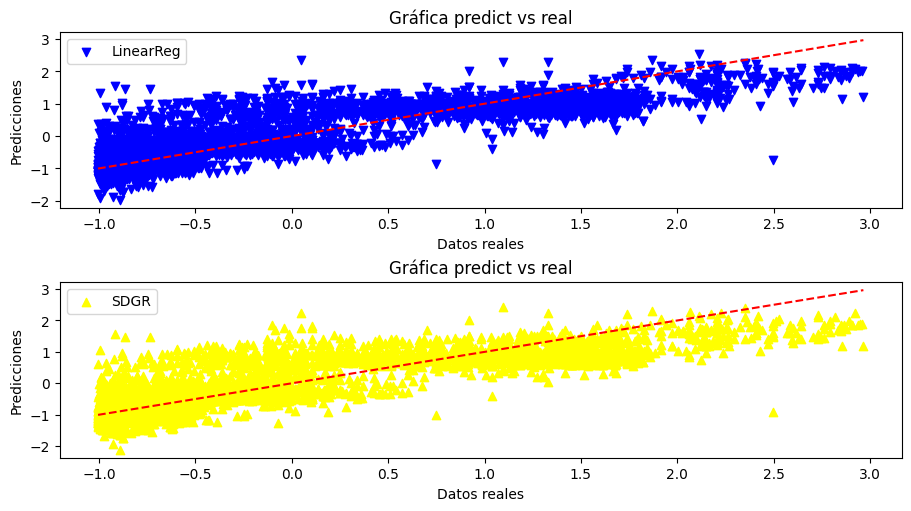

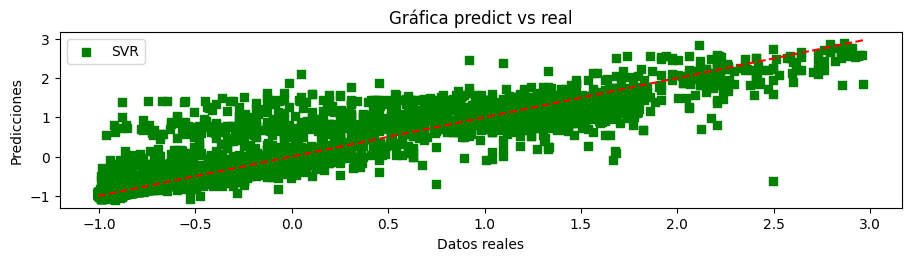

In [17]:
fig, ax = plt.subplots(2, figsize=(9, 5), layout='constrained')

ax[0].scatter(y_test,y_pred_l, label='LinearReg', marker='v', c='blue')
ax[1].scatter(y_test,y_pred_r, label='SDGR', marker='^', c='yellow')
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', ls='--')
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', ls='--')
ax[0].set_xlabel('Datos reales')
ax[0].set_ylabel('Predicciones')
ax[0].set_title('Gráfica predict vs real')
ax[1].set_xlabel('Datos reales')
ax[1].set_ylabel('Predicciones')
ax[1].set_title('Gráfica predict vs real')

ax[0].legend()
ax[1].legend()

fig2, ax2 = plt.subplots(1, figsize=(9, 2.5), layout='constrained')

ax2.scatter(y_test,y_pred_s, label='SVR', marker='s', c='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', ls='--')
ax2.set_xlabel('Datos reales')
ax2.set_ylabel('Predicciones')
ax2.set_title('Gráfica predict vs real')

ax2.legend()
plt.show()

## Y gráficamente se evidencia que el de maquina de soporte vectorial es el mejor ##